In [1]:
import matplotlib.pyplot as plt

In [2]:
import qutip
from qutip.qip.operations import hadamard_transform

In [3]:
import numpy as np

In [4]:
Nqubits = 4
hadamard = hadamard_transform(Nqubits)

In [5]:
qubit_zero = qutip.basis(2, 0)
qubit_one = qutip.basis(2, 1)

In [6]:
N_Grover = np.pi/4 * np.sqrt(2**Nqubits)

## Solution vector and oracle operator

In [7]:
solution = np.random.randint(0, 2, size=(Nqubits,)).tolist()
print(solution)

[1, 0, 1, 0]


In [8]:
solution_ket = qutip.basis([2]*Nqubits, solution)

In [9]:
oracle = qutip.qeye([2]*Nqubits) - 2*solution_ket*solution_ket.trans() 

## Set up operations of Grover step

In [10]:
zero_ket = qutip.basis([2]*Nqubits, [0]*Nqubits)

In [11]:
phase_flip = 2 * zero_ket * zero_ket.trans() - qutip.qeye([2]*Nqubits)

In [12]:
psi_ket = hadamard_transform(Nqubits) * zero_ket

## Perform Grover's algorithm

In [13]:
def plot_amplitudes(state_ket):
    plt.bar(np.arange(state_ket.shape[0]), state_ket.data.todense().A1.real)
    plt.bar(np.arange(state_ket.shape[0]), state_ket.data.todense().A1.imag)

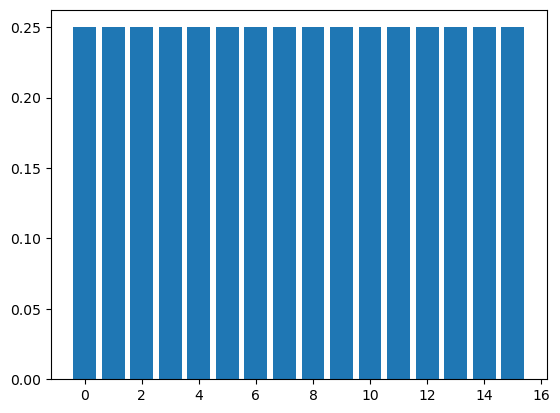

In [14]:
plot_amplitudes(psi_ket)

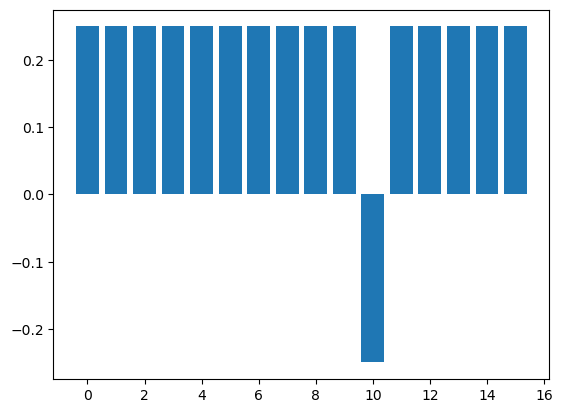

In [15]:
plot_amplitudes(oracle * psi_ket)

In [16]:
plot_amplitudes(hadamard_transform(Nqubits) * oracle * psi_ket)

In [17]:
plot_amplitudes(phase_flip * hadamard * oracle * psi_ket)

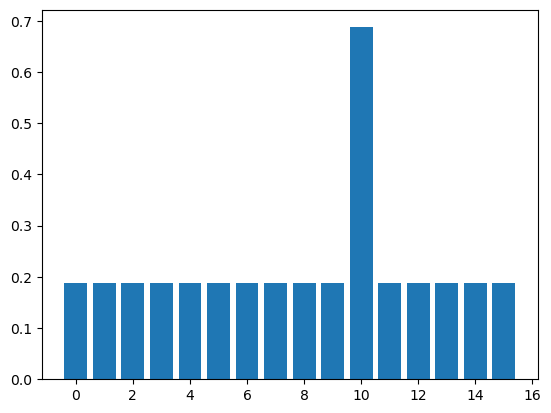

In [18]:
plot_amplitudes(hadamard * phase_flip * hadamard * oracle * psi_ket)

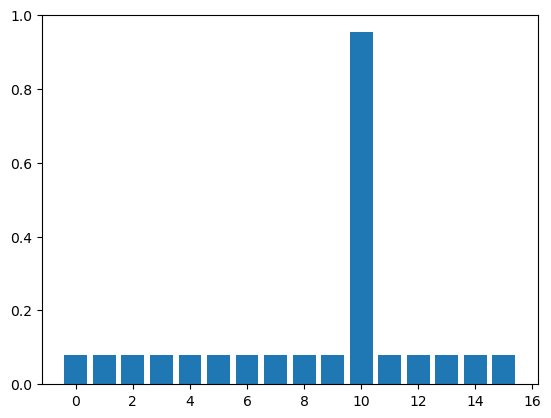

In [19]:
plot_amplitudes(hadamard * phase_flip * hadamard * oracle * hadamard * phase_flip * hadamard * oracle * psi_ket)

In [20]:
plot_amplitudes(hadamard * phase_flip * hadamard * oracle * hadamard * phase_flip * hadamard * oracle * hadamard * phase_flip * hadamard * oracle * psi_ket)

## Try to reproduce the arrow plot

Make the vector of all states not being a solution

In [21]:
nonsolution_ket = (psi_ket - solution_ket/np.sqrt(solution_ket.shape[0])).unit()

In [22]:
def get_amps(state_ket):
    nonsol_amp = state_ket.overlap(nonsolution_ket)
    sol_amp = state_ket.overlap(solution_ket)
    
    return nonsol_amp, sol_amp

def print_amps(state_ket):
    nonsol_amp, sol_amp = get_amps(state_ket)
    
    print("not solution:", np.round(nonsol_amp, 2), "solution:", np.round(sol_amp, 2), 
          "total prob.:", np.round(np.abs(sol_amp)**2 + np.abs(nonsol_amp)**2, 2))

In [23]:
print_amps(psi_ket)

not solution: (0.97+0j) solution: (0.25+0j) total prob.: 1.0


In [24]:
state = oracle * psi_ket

In [25]:
print_amps(state)

not solution: (0.97+0j) solution: (-0.25+0j) total prob.: 1.0


In [26]:
state = hadamard * oracle * psi_ket
print_amps(state)

not solution: (0.29+0j) solution: (-0.12+0j) total prob.: 0.1


In [27]:
state = hadamard * phase_flip * hadamard * oracle * psi_ket

In [28]:
print_amps(state)

not solution: (0.73+0j) solution: (0.69+0j) total prob.: 1.0


In [29]:
state = psi_ket
for i in range(int(N_Grover)):
    state = oracle * state
    print_amps(state)
    
    state = hadamard * phase_flip * hadamard * state
    print_amps(state)

not solution: (0.97+0j) solution: (-0.25+0j) total prob.: 1.0
not solution: (0.73+0j) solution: (0.69+0j) total prob.: 1.0
not solution: (0.73+0j) solution: (-0.69+0j) total prob.: 1.0
not solution: (0.3+0j) solution: (0.95+0j) total prob.: 1.0
not solution: (0.3+0j) solution: (-0.95+0j) total prob.: 1.0
not solution: (-0.2+0j) solution: (0.98+0j) total prob.: 1.0


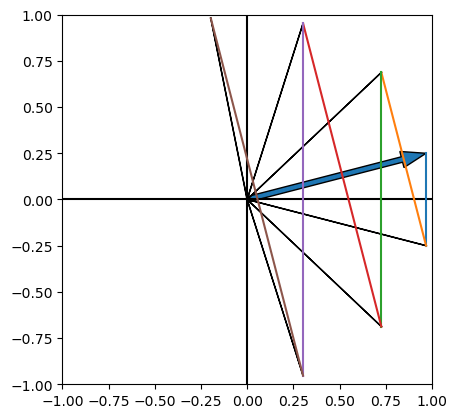

In [42]:
state = psi_ket

ax = plt.subplot()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect("equal", "box")
ax.plot([0, 0], [-1, 1], "k")
ax.plot([-1, 1], [0, 0], "k")

nonsol_amp, sol_amp = get_amps(state)
ax.arrow(0, 0, nonsol_amp.real, sol_amp.real, length_includes_head=True, width=0.03)
for i in range(int(N_Grover)):
    
    state = oracle * state

    old_nonsol_amp = nonsol_amp
    old_sol_amp = sol_amp
    nonsol_amp, sol_amp = get_amps(state)
    ax.arrow(0, 0, nonsol_amp.real, sol_amp.real)
    ax.plot([old_nonsol_amp, nonsol_amp], [old_sol_amp, sol_amp])

    state = hadamard * phase_flip * hadamard * state
    
    old_nonsol_amp = nonsol_amp
    old_sol_amp = sol_amp
    nonsol_amp, sol_amp = get_amps(state)
    ax.arrow(0, 0, nonsol_amp.real, sol_amp.real)
    ax.plot([old_nonsol_amp, nonsol_amp], [old_sol_amp, sol_amp])
    
    

In [31]:
sol_amp.real

0.9804687499999983